In [0]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.utils import plot_model
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

In [0]:
path = getcwd()

In [0]:
train_data_dir = path + "/PlantVillage/PlantVillage/train"
validation_data_dir = path + "/PlantVillage/PlantVillage/val"

In [71]:
!ls PlantVillage/PlantVillage/train

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 background
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_vi

In [70]:
!ls PlantVillage/PlantVillage/train/Apple___Apple_scab

'01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'
'01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG'
'0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055.JPG'
'03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334.JPG'
'0537ad56-3d24-4e97-a947-65b9b37f8988___FREC_Scab 3079.JPG'
'058d5e64-2c57-45ba-94cb-ac83fd1885a0___FREC_Scab 3181.JPG'
'0631708e-5bac-4611-8ff9-6d5ee87ce3b3___FREC_Scab 3252.JPG'
'0672ab32-9fce-41f3-ae69-e39c48a0a292___FREC_Scab 3347.JPG'
'06cf74b6-d895-4a09-b3b1-bc63579f8c33___FREC_Scab 3128.JPG'
'073b509f-c1ea-4e61-881b-2e874c5f4199___FREC_Scab 3286.JPG'
'0812e1e4-6d1b-4264-8f23-6519354fc5a6___FREC_Scab 3293.JPG'
'08c42d78-aa7b-4106-b0c1-b260f898dcba___FREC_Scab 3151.JPG'
'09e40e4f-f8bc-4537-b20d-0b244760dbf4___FREC_Scab 3216.JPG'
'0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG'
'0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab 2973.JPG'
'0a769a71-052a-4f19-a4d8-b0f0cb75541c___FREC_Scab 3165.JPG'
'0b1e31fa-cbc0-41ed-9139-c794e6855e82___

In [0]:
img_width, img_height = 256, 256
batch = 64
epochs = 2

In [0]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.1,
    rotation_range=10,
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.1,
    rotation_range=10, 
    preprocessing_function=preprocess_input
    )

In [46]:
train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_width, img_height),
)

val_generator = val_datagen.flow_from_directory(
    directory=validation_data_dir,
    target_size=(img_width, img_height),
)

Found 32110 images belonging to 39 classes.
Found 8013 images belonging to 39 classes.


In [48]:
resnet50 = ResNet50(include_top=False, weights="imagenet", input_shape=(img_width, img_height, 3))
resnet50.trainable = False

x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(39, activation="softmax")(x)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
model = Model(resnet50.input, x)

In [0]:
from keras.optimizers import Adam

In [0]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpoint = ModelCheckpoint("res_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [54]:
model.fit_generator(
    train_generator,
    epochs=5,
    steps_per_epoch=50,
    validation_data=val_generator,
    validation_steps=25,
    callbacks = [checkpoint, early]
)

Epoch 1/5
50/50 [==============================] - 731s 15s/step - loss: 1.4659 - acc: 0.6469 - val_loss: 0.5031 - val_acc: 0.8512

Epoch 00001: val_acc improved from -inf to 0.85125, saving model to res_1.h5
Epoch 2/5
50/50 [==============================] - 589s 12s/step - loss: 0.3272 - acc: 0.9038 - val_loss: 0.1769 - val_acc: 0.9450

Epoch 00002: val_acc improved from 0.85125 to 0.94500, saving model to res_1.h5
Epoch 3/5
49/50 [============================>.] - ETA: 9s - loss: 0.2313 - acc: 0.9298 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 73 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/50 [==============================] - 615s 12s/step - loss: 0.2367 - acc: 0.9281 - val_loss: 0.1860 - val_acc: 0.9450

Epoch 00003: val_acc did not improve from 0.94500
Epoch 4/5
50/50 [==============================] - 586s 12s/step - loss: 0.2015 - acc: 0.9338 - val_loss: 0.2228 - val_acc: 0.9337

Epoch 00004: val_acc did not improve from 0.94500
Epoch 5/5
50/50 [==============================] - 578s 12s/step - loss: 0.1505 - acc: 0.9556 - val_loss: 0.0948 - val_acc: 0.9712

Epoch 00005: val_acc improved from 0.94500 to 0.97125, saving model to res_1.h5


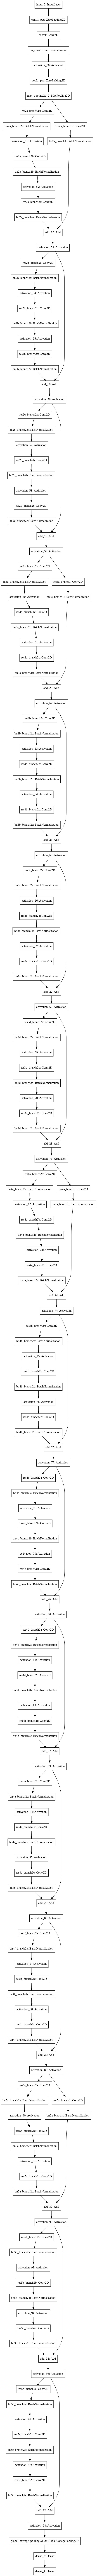

In [69]:
plot_model(model, to_file='model.png')